<a href="https://colab.research.google.com/github/JetteKA/BigData/blob/master/kmeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
n_clusters = 10
num_centroids = 5

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [19]:
x_train.shape

(60000, 28, 28)

In [0]:
x = x_train.reshape((x_train.shape[0], -1))
x = np.divide(x, 255.)

In [0]:
kmeans = KMeans(n_clusters=n_clusters)

In [0]:
cluster_distance = kmeans.fit_transform(x)

In [0]:
closest_to_centroid = cluster_distance.argsort(axis=0)[:num_centroids]

In [0]:
ctc = closest_to_centroid.T

In [0]:
word_label = {0:"T-shirt/top",
              1:"Trouser",
              2:"Pullover",
              3:"Dress",
              4:"Coat",
              5:"Sandal",
              6:"Shirt",
              7:"Sneaker",
              8:"Bag",
              9:"Ankle boot"}

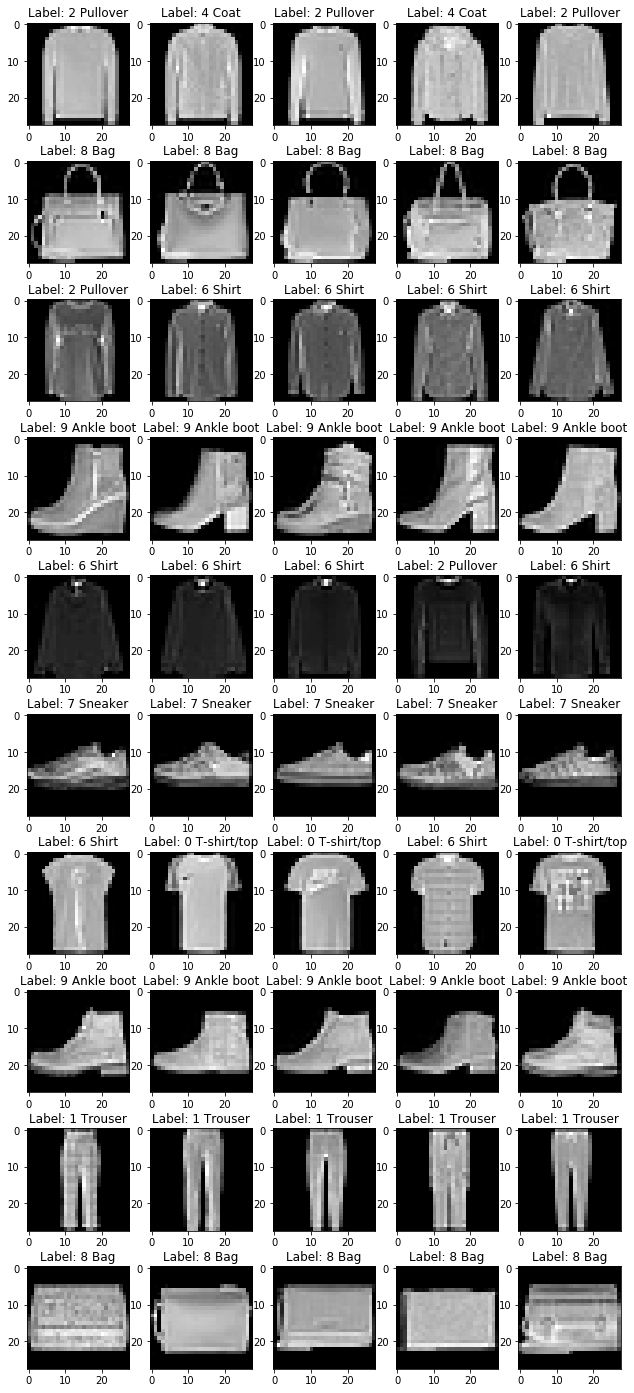

In [20]:
plt.figure(figsize = (15,25))
bottom = 0.35

x_labelled = []
y_labelled = np.empty(int(n_clusters*num_centroids))
for i, index in enumerate(ctc.flatten()):

 x_labelled.append(x_train[index])
 y_labelled[i] = y_train[index]

 plt.subplots_adjust(bottom)
 plt.subplot(n_clusters,num_centroids,i+1)
 plt.title('Label: {} {}'.format(y_train[index], word_label[y_train[index]]),fontsize = 12)
 plt.imshow(x[index].reshape(28, 28), cmap='gray')

In [0]:
x_labelled = np.array(x_labelled)


In [0]:
x_unlabelled = np.delete(x_train, ctc.flatten(), axis=0)
y_unlabelled = np.delete(y_train, ctc.flatten())